In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change the working directory to the desired folder
import os
os.chdir('/content/drive/My Drive/PPS')

# Verify the current working directory
print("Current working directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/PPS


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#define the file
file_path = "/content/drive/My Drive/PPS/fraud_data.csv"

#load the datasets
df = pd.read_csv(file_path)

In [4]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [6]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [7]:
#drop the value of 'is_fraud' if it's not 1 or 0
df=df[df['is_fraud'].isin(['0', '1'])]

In [8]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844


In [28]:
#feature engineering
#creating age category
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="mixed")

df['dob'] = pd.to_datetime(df['dob'], format="mixed")
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


In [30]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,age,time_of_day,hour,day_of_week,distance_km,professions,month
0,2019-01-04 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,65.654142,-164.722603,1,80,00:58,0,Friday,109.285552,"Education, Training, and Research",January
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,65.468863,-165.473127,1,80,15:06,15,Friday,79.856896,"Education, Training, and Research",January
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,65.347667,-165.914542,1,80,22:37,22,Friday,66.807915,"Education, Training, and Research",January
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,64.445035,-166.080207,1,80,23:06,23,Friday,39.636227,"Education, Training, and Research",January
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,65.447094,-165.446843,1,80,23:59,23,Friday,77.611529,"Education, Training, and Research",January


In [31]:
def binarize(value):
    if 18 <= value <= 25:
        return '18-25'
    elif 26 <= value <= 35:
        return '26-35'
    elif 36 <= value <= 49:
        return '36-49'
    elif 50 <= value <= 69:
        return '50-69'
    else:
        return '70-90'
df['age'] = df['age'].apply(binarize)

In [32]:
df['age'].unique()

array(['70-90', '50-69', '36-49', '26-35', '18-25'], dtype=object)

<ipython-input-33-554ad92d107a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fraud/non_fraud , palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, y

Text(0, 0.5, 'probability of fraud')

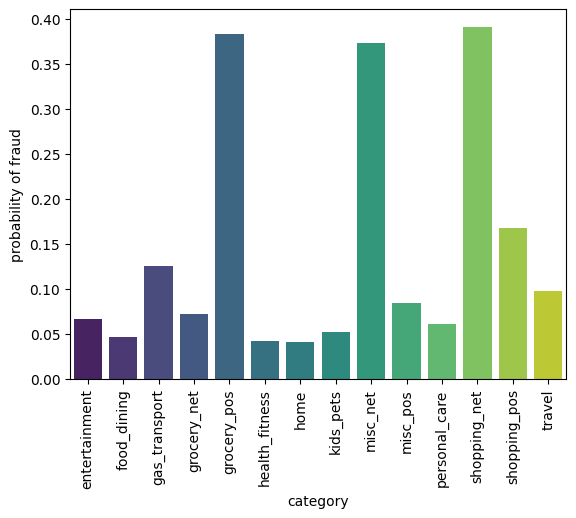

In [33]:
# fraud to non fraud ratio
non_fraud = df[df['is_fraud'] == 0]['category'].value_counts()
fraud = df[df['is_fraud'] == 1]['category'].value_counts()
sns.barplot(fraud/non_fraud , palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('probability of fraud')

In [35]:
def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the DataFrame
df['time_category'] = df['trans_date_trans_time'].dt.time.apply(categorize_time)

In [37]:
df['time_category'].unique()

array(['Night', 'Day', 'Morning', 'Evening'], dtype=object)

In [12]:
#Extracting day of the week.
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

In [42]:
df['day_of_week'].unique()

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Thursday', 'Wednesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

In [44]:
df['day_of_week'].head()

,day_of_week
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday


In [14]:
#Create a new measure of the distance between lat and long and merchant lat and long
## Define the Haversine function
import math

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371.0  # Radius of Earth in kilometers
    distance = r * c
    return distance

In [15]:
## Apply Haversine function row-wise
df['distance_km'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

In [16]:
#Creating job categories.
def job_categories(profession):
    profession_lower = profession.lower()

    # Education, Training, and Research
    if any(keyword in profession_lower for keyword in [
        'administrator, education', 'lecturer', 'teacher', 'professor', 'telecommunications researcher',
        'research scientist', 'education officer', 'learning mentor', 'teaching laboratory technician',
        'special educational needs', 'research officer', 'science writer', 'education administrator']):
        return 'Education, Training, and Research'
    # Healthcare, Therapy, and Well-being
    elif any(keyword in profession_lower for keyword in [
        'nurse', 'therapist', 'psychologist', 'counsellor', 'pharmacist', 'osteopath', 'chiropodist',
        'health', 'clinical', 'physiotherapist', 'medical', 'audiological', 'exercise physiologist',
        'music therapist', 'occupational therapist', 'podiatrist', 'occupational hygienist']):
        return 'Healthcare, Therapy, and Well-being'
    # Science, Engineering, and Technology
    elif any(keyword in profession_lower for keyword in [
        'cytogeneticist', 'scientist', 'engineer', 'geoscientist', 'geologist',
        'cartographer', 'soil scientist', 'water engineer', 'systems developer']):
        return 'Science, Engineering, and Technology'
    # Business, Finance, and Law
    elif any(keyword in profession_lower for keyword in [
        'solicitor', 'legal', 'accountant', 'tax inspector', 'investment banker', 'economist',
        'investment analyst', 'comptroller', 'financial', 'officer', 'sales', 'retail merchandiser',
        'manager', 'chief marketing officer', 'marketing executive', 'public relations', 'futures trader',
        'clothing/textile technologist', 'insurance broker', 'advertising account planner']):
        return 'Business, Finance, and Law'
    # Creative Arts, Design, and Media
    elif any(keyword in profession_lower for keyword in [
        'artist', 'set designer', 'web designer', 'glass blower', 'fashion designer', 'community arts worker',
        'editor', 'journalist', 'video editor', 'musician', 'commissioning editor',
        'television', 'radio', 'media', 'production', 'designer', 'features editor']):
        return 'Creative Arts, Design, and Media'
    # Construction, Planning, and Environment
    elif any(keyword in profession_lower for keyword in [
        'architect', 'landscape architect', 'building surveyor', 'town planner',
        'planning and development', 'minerals surveyor', 'civil engineer',
        'historic buildings inspector', 'petroleum engineer', 'construction', 'surveyor, minerals',
        'land/geomatics surveyor', 'buyer, industrial', 'surveyor, land/geomatics', 'contractor',
        'surveyor, mining', 'metallurgist']):
        return 'Construction, Planning, and Environment'
    # Public Sector, Civil Service, and Government
    elif any(keyword in profession_lower for keyword in [
        'civil service', 'local government officer', 'immigration officer',
        'armed forces', 'charity officer', 'international aid', 'police', 'firefighter',
        'intelligence analyst', 'public librarian', 'administrator, local government']):
        return 'Public Sector, Civil Service, and Government'
    # IT and Information Systems
    elif any(keyword in profession_lower for keyword in [
        'network engineer', 'systems analyst', 'information officer', 'it consultant',
        'information systems manager', 'developer']):
        return 'IT and Information Systems'
    # Pilot
    elif any(keyword in profession_lower for keyword in [
        'airline pilot', 'pilot, airline']):
        return 'Pilot'

    # Other
    else:
        return 'Other'

# Apply the function to the column 'job'
df['professions'] = df['job'].apply(job_categories)

In [23]:
df['month'] = df['trans_date_trans_time'].dt.month_name()

In [24]:
df['month'].head()

,month
0,January
1,January
2,January
3,January
4,January


In [46]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'time_of_day', 'hour', 'day_of_week',
       'distance_km', 'professions', 'month', 'time_category', 'trans_date'],
      dtype='object')

In [47]:
#drop unwanted columns
df=df.drop(['trans_date_trans_time', 'merchant', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'time_of_day', 'hour', 'distance_km', 'trans_date' ], axis=1)

In [48]:
df.head()

,category,amt,city,is_fraud,age,day_of_week,professions,month,time_category
0,grocery_net,14.37,Wales,1,70-90,Friday,"Education, Training, and Research",January,Night
1,shopping_net,966.11,Wales,1,70-90,Friday,"Education, Training, and Research",January,Day
2,misc_pos,49.61,Wales,1,70-90,Friday,"Education, Training, and Research",January,Night
3,grocery_pos,295.26,Wales,1,70-90,Friday,"Education, Training, and Research",January,Night
4,health_fitness,18.17,Wales,1,70-90,Friday,"Education, Training, and Research",January,Night


from matplotlib import pyplot as plt
_df_0['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('time_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_fraud']
  ys = series['amt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('is_fraud', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('amt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['is_fraud']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'is_fraud'}, axis=1)
              .sort_values('is_fraud', ascending=True))
  xs = counted['is_fraud']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('is_fraud', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_category']
  ys = series['amt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('time_category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_category')
_ = plt.ylabel('amt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_category'}, axis=1)
              .sort_values('time_category', ascending=True))
  xs = counted['time_category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('time_category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['amt'].plot(kind='line', figsize=(8, 4), title='amt')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['time_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='amt', y='time_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
data=df

In [51]:
data.dtypes

,0
category,category
amt,float64
city,category
is_fraud,int64
age,object
day_of_week,category
professions,category
month,object
time_category,object


In [52]:
#handle categorical variables
label_encoders={}
categorical_cols=['category', 'city', 'age', 'day_of_week', 'professions', 'month', 'time_category']
for col in categorical_cols:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoders[col]=le

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.layers import Dense

# Assuming your data is already loaded into a DataFrame called `data`

# Step 1: Split the data into X and y
X = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']  # Target

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the data (fit scaler on training data and use the same scaler on test data)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build and train your model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_smote_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_smote_scaled, y_train_smote, epochs=50, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.35).astype(int)

# You can now proceed with evaluating the model's performance metrics as before


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7838 - loss: 0.4480 - val_accuracy: 0.9446 - val_loss: 0.2074
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9210 - loss: 0.2055 - val_accuracy: 0.9488 - val_loss: 0.1744
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.1793 - val_accuracy: 0.9425 - val_loss: 0.1853
Epoch 4/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1748 - val_accuracy: 0.9412 - val_loss: 0.1802
Epoch 5/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9370 - loss: 0.1706 - val_accuracy: 0.9540 - val_loss: 0.1531
Epoch 6/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9439 - loss: 0.1587 - val_accuracy: 0.9564 - val_loss: 0.1578
Epoch 7/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9438 - loss: 0.1521 - val_accuracy: 0.9571 - val_loss: 0.1484
Epoch 8/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9494 - loss: 0.1488 - val_accuracy: 0.9550 - val_

In [64]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Step 12: Predict on the test data (get probabilities)
y_pred_prob = model.predict(X_test_scaled)

# Step 13: Adjust the threshold for better fraud detection
threshold = 0.8  # Experiment with this value
y_pred = (y_pred_prob > threshold).astype(int)

# Step 14: Evaluate the model using AUC, F1, and accuracy
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 15: Display results
print(f"Best Threshold: {threshold}, Best F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(classification_rep)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Threshold: 0.8, Best F1 Score: 0.9559228650137741
ROC-AUC Score: 1.00
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2520
           1       0.97      0.94      0.96       369

    accuracy                           0.99      2889
   macro avg       0.98      0.97      0.97      2889
weighted avg       0.99      0.99      0.99      2889



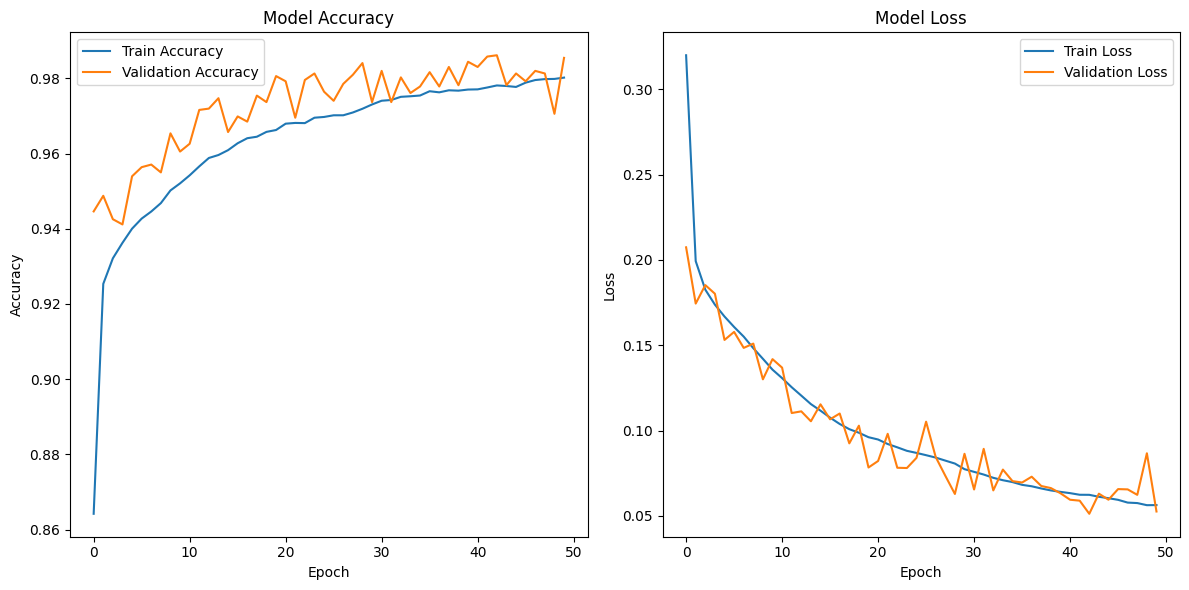

In [65]:
import matplotlib.pyplot as plt

# Assuming `history` is the result of your model.fit() call
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Number of splits for cross-validation
n_splits = 5

# Initialize Stratified K-Folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
roc_auc_scores = []
f1_scores = []
accuracy_scores = []

# Loop over the cross-validation splits
for train_index, test_index in skf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define the model (assuming you already have the model architecture defined)
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, verbose=0)

    # Predict probabilities and binary outcomes on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob >= 0.35).astype(int)

    # Evaluate the model using ROC AUC, F1 score, and accuracy
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Print the average scores with standard deviation
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
